# SVM for classification

Load IRIS dataset, check its contents:


In [7]:
#load + check le dataset
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [8]:
#Slpit en deux (train et test)
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [9]:
#Classifie
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [10]:
# Prend les deux colonnes
X_two_features = iris.data[:, :2]

# Filtre iris.target = 2
target_indices = iris.target != 2
X_filtered = X_two_features[target_indices]
y_filtered = iris.target[target_indices]

# Split train et test des dataset filtrés
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42)

print(X_train_filtered.shape)
print(X_test_filtered.shape)

# SVM sur le dataset filtré
SVMmodel_filtered = SVC(kernel='linear')
SVMmodel_filtered.fit(X_train_filtered, y_train_filtered)

# Evalue son accuracy
score_filtered = SVMmodel_filtered.score(X_test_filtered, y_test_filtered)
print("Accuracy:", score_filtered)

(80, 2)
(20, 2)
Accuracy: 1.0


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

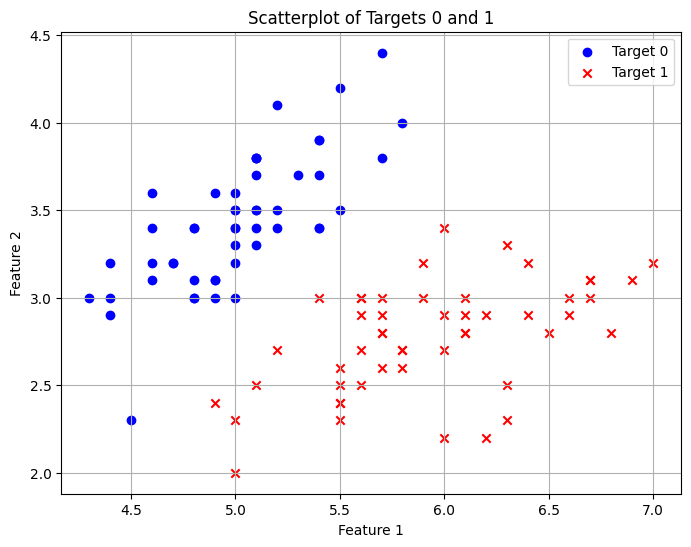

In [11]:
import matplotlib.pyplot as plt

# Filtre pour 0 et 1
X_class0 = X_filtered[y_filtered == 0]
X_class1 = X_filtered[y_filtered == 1]

# Check la séparabilité
plt.figure(figsize=(8, 6))
plt.scatter(X_class0[:, 0], X_class0[:, 1], label='Target 0', color='blue', marker='o')
plt.scatter(X_class1[:, 0], X_class1[:, 1], label='Target 1', color='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot of Targets 0 and 1')
plt.legend()
plt.grid(True)
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [12]:
# Liste de la regularisation en test
C_values = [1, 12, 74, 200]

# Une itération pour chaque C, train + test
for C_value in C_values:

    SVMmodel_C = SVC(kernel='linear', C=C_value)
    SVMmodel_C.fit(X_train_filtered, y_train_filtered)

    accuracy_C = SVMmodel_C.score(X_test_filtered, y_test_filtered)
    print(f"Accuracy for C={C_value}: {accuracy_C}")

Accuracy for C=1: 1.0
Accuracy for C=12: 1.0
Accuracy for C=74: 1.0
Accuracy for C=200: 1.0


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

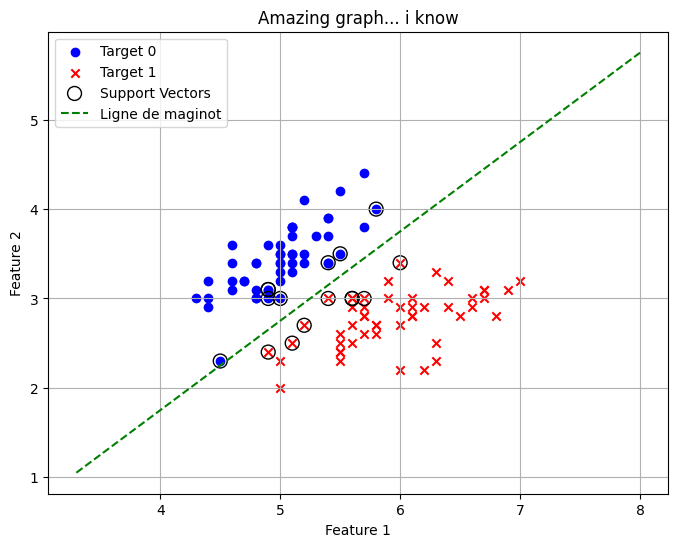

In [13]:
import numpy as np
# SVM model (coef + intercept)
w = SVMmodel_filtered.coef_[0]
b = SVMmodel_filtered.intercept_[0]

# Check les points
plt.figure(figsize=(8, 6))
plt.scatter(X_class0[:, 0], X_class0[:, 1], label='Target 0', color='blue', marker='o')
plt.scatter(X_class1[:, 0], X_class1[:, 1], label='Target 1', color='red', marker='x')
plt.scatter(SVMmodel_filtered.support_vectors_[:, 0], SVMmodel_filtered.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Trace la ligne
x0_min, x0_max = X_filtered[:, 0].min() - 1, X_filtered[:, 0].max() + 1
x1_min, x1_max = X_filtered[:, 1].min() - 1, X_filtered[:, 1].max() + 1
x0 = np.linspace(x0_min, x0_max, 100)
x1 = (-w[0] / w[1]) * x0 - b / w[1]
plt.plot(x0, x1, color='green', linestyle='--', label='Ligne de maginot')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Amazing graph... i know')
plt.legend()
plt.grid(True)
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

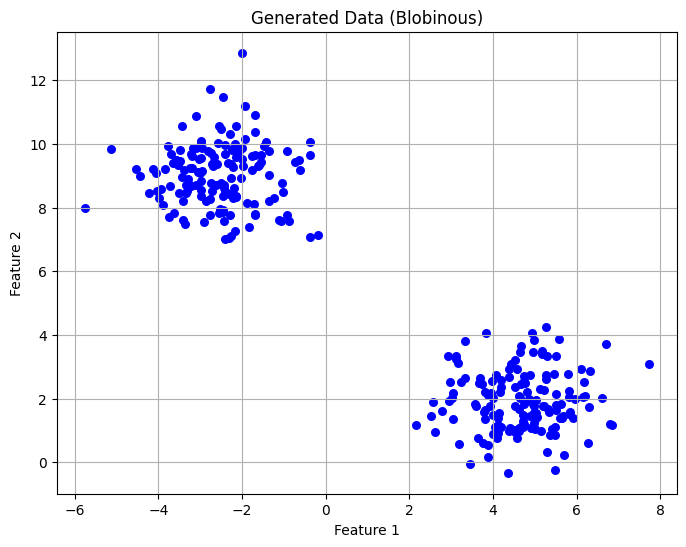

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import OneClassSVM

# Blob de gauss en 2D tah les fous
X, _ = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=1.0, random_state=42)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', s=30)
plt.title('Generated Data (Blobinous)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

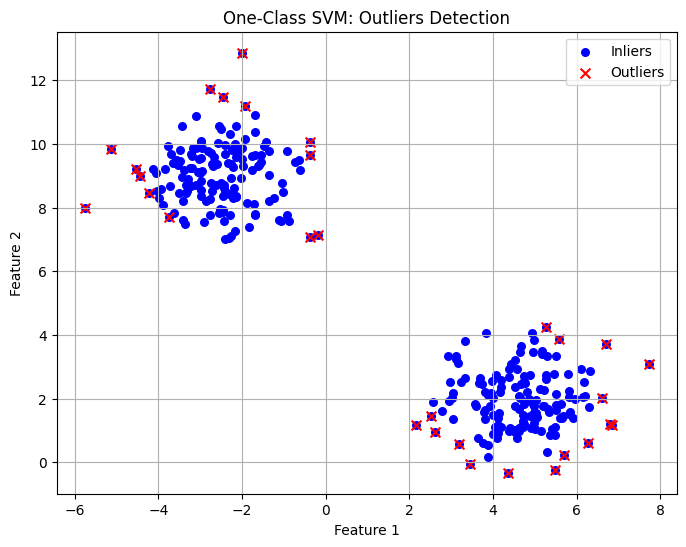

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import OneClassSVM

# Blob de gauss en 2D tahr les fous
X, _ = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=1.0, random_state=42)

# SVM model en OneClass
svm = OneClassSVM(kernel='rbf', nu=0.1)
svm.fit(X)

# prediction des points
y_pred = svm.predict(X)

# trouver les outliers (label -1)
outliers = X[y_pred == -1]

# Plot data + outliers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Inliers', s=30)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers', s=50, marker='x')
plt.title('One-Class SVM: Outliers Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Plot the support vectors:

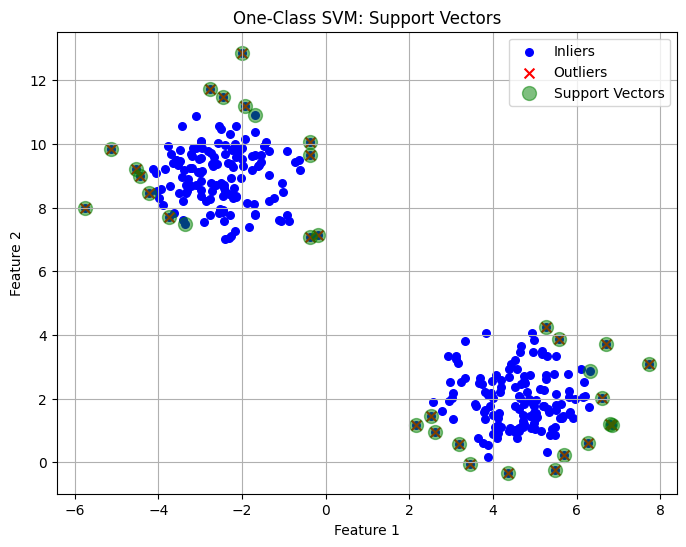

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import OneClassSVM

# Blob de gauss en 2D tahr les fous
X, _ = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=1.0, random_state=42)

# SVM model en OneClass
svm = OneClassSVM(kernel='rbf', nu=0.1)
svm.fit(X)

# prediction des points
y_pred = svm.predict(X)

# trouver les outliers (label -1)
outliers = X[y_pred == -1]

# Les vecteurs de support
support_vectors = svm.support_vectors_

# Plot data + outliers + support vecteur
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Inliers', s=30)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers', s=50, marker='x')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='green', label='Support Vectors', s=100, alpha=0.5)
plt.title('One-Class SVM: Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

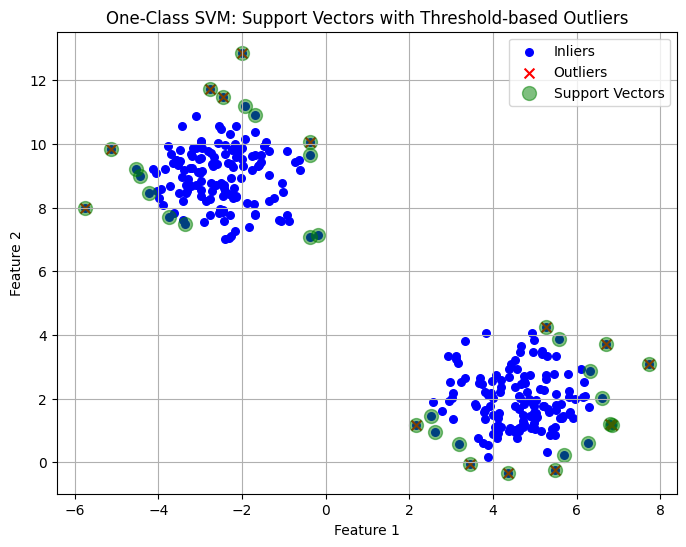

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import OneClassSVM

# Blob de gauss en 2D tahr les fous
X, _ = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=1.0, random_state=42)

# SVM model en OneClass
svm = OneClassSVM(kernel='rbf', nu=0.1)
svm.fit(X)

# Compute the decision function scores for each data point
decision_scores = svm.decision_function(X)

# Threshold à 5% + met les outliers en fonction + supp vector
threshold = np.percentile(decision_scores, 5)
outliers = X[decision_scores < threshold]
support_vectors = svm.support_vectors_

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Inliers', s=30)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers', s=50, marker='x')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='green', label='Support Vectors', s=100, alpha=0.5)
plt.title('One-Class SVM: Support Vectors with Threshold-based Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()